# COVID-19 - Brasil

<p><img style="float: center;margin:5px 20px 5px 200px; max-width:500px" src="https://portal.trf1.jus.br/data/files/93/13/87/C6/D14E0710630E1E07F32809C2/JtVH5Khvihib7dBDFY9ZDR.jpg"></p>

## Conteúdo:

Este notebook foi criado com o intuito de comparar o número de casos confirmados entre os estados do Brasil. Para isso, ele foi dividdo em 6 partes:

**1. Importando bibliotecas**

>Foram utilizadas as bibliotecas usuais (pandas, matplotlib e numpy), seaborn e a função `curve_fit` do módulo `scipy.optimize`
    

**2. Definindo Funções**

   * ler_csv_estado(`sigla`): Lê o csv do estado e limpa os dados necessarios. `sigla`: string com a sigla do estado e retorna um Data Frame.
   * curva(`x`, `c0`, `c1`, `c2`, `c3`): Retorna uma equação exponencial com os parâmetros `x`, `c0`, `c1`, `c2`, `c3`;
   * plotar_estados_dias(`estados_para_plotar`): Plota os Casos Confirmados por Dias Decorridos, sobrepondo os estados selecionados. `estados_para_plotar`: lista com as siglas dos estados.
   * linha_exp(`estado`, `dias_a_frente`=`0`): Ajusta uma curva exponencial aos casos confirmados do estado selecionado. `estado`: sigla do estado selecionado; `dias_a_frente`: número de dias a serem previstos.


**3. Lendo os dados**

>Importa os dados do site [Brasil.io](https://brasil.io/dataset/covid19/caso)
    

**4. Criando Data Frames**

>Cria data Frames  utilizando a função `ler_csv_estado(sigla)` e faz a limpeza necessária para o propósio desse Notebook.


**5. Visualizções com exemplos**

>Gera os gráficos de estados sobrepostos e faz previsões para estados individuais

**6. Faça você mesmo**

>Escolha os estados e os dias de previsão para plotar ;-)

***
### 1. Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy.optimize import curve_fit

***
### 2. Definindo funções

In [2]:
def ler_csv_estado(sigla):
    '''Lê o csv do estado e limpa os dados necessarios
    
    sigla: string com a sigla do estado
    
    retorna um Data Frame
    '''
    
    path = 'estados/'+str(sigla)+'.csv'
    df = pd.read_csv(path, parse_dates=['date'])
    df['dias'] = df['dias'].str.replace(' days 00:00:00.000000000', '').astype('int')
    
    return df

In [3]:
def curva(x, c0, c1, c2, c3):
    '''Retorna uma equação exponencial'''
    return c0 + c1*x + c2*np.exp(-c3*x)

In [4]:
def plotar_estados_dias(estados_para_plotar):
    '''Plota os Casos Confirmados por Dias Decorridos, sobrepondo os Estados selecionados'''
    
    if estados_para_plotar == []:
        print('Por favor, escolha uma lista de Estados para plotar utilizando suas siglas')
    
    else:
        sns.set()
    
        for estado in estados_para_plotar:
            df = ler_csv_estado(estado)
            hoje = int(df[df['dias']==max(df['dias'])]['confirmed'].values)
            plt.plot(df['dias'], df['confirmed'], label = estado+': {0:.0f} casos hoje'.format(hoje))
        
        plt.title('COVID-19')
        plt.xlabel('Dias Decorridos')
        plt.ylabel('Casos Confirmados')
        plt.legend()
        plt.xticks(rotation=90)
    
        return plt.show()

In [5]:
def linha_exp(estado, dias_a_frente=0):
    '''Ajusta uma curva exponencial aos casos confirmados do estado selecionado'''
    
    if estado == '':
        print('Por favor, escolha um Estado para plotar utilizando sua sigla')
    
    else:
        # Parâmetros a serem ajustados:
        g = [100, 0.01, 100, 0.01]
    
        # Data Frame do Estado: 
        df = ler_csv_estado(estado)
    
        # Ajustando aos dados:
        t = df['dias'].values
        con = df['confirmed'].values
        c, cov = curve_fit(curva, t, con, g, maxfev=10000000)
    
        # Criando a curva
        previsao = max(df['dias']+dias_a_frente)
        x = np.linspace(0, previsao, previsao+1)
        y = np.empty(len(x))

        for i in range(len(x)):
            y[i] = curva(x[i], c[0], c[1], c[2], c[3])
    
        # Gerando vsualização:
        sns.set()
    
        # Definindo x_ticks e labels:
        x_ticks = [0]
        while x_ticks[-1]+5 < previsao:
            x_ticks.append(x_ticks[-1]+5)

        if previsao - x_ticks[-1] <=1:
            x_ticks[-1] = previsao
        else:
            x_ticks.append(previsao)

        x_labels = []
        for i in range(len(x_ticks)):
            x_labels.append((min(df['date']) + datetime.timedelta(days=x_ticks[i])))
        
        x_labels = [dia.date().strftime("%d/%m/%y") for dia in x_labels]

        # Plotando o gráfico:
        hoje = int(df[df['dias']==max(df['dias'])]['confirmed'].values)
        plt.plot(df['dias'], df['confirmed'], label = estado+': {0:.0f} casos hoje'.format(hoje))
        plt.plot(x, y, label = 'Curva Ajustada', linestyle='--', alpha=0.7)
        plt.title('COVID-19 - Previsão para {} dias'.format(dias_a_frente))
        plt.xlabel('Dias')
        plt.ylabel('Casos Confirmados')
        plt.legend()
        plt.xticks(x_ticks, x_labels, rotation=45)
        plt.scatter(x[-1],y[-1], color="orange")
        anota = '{0:.0f} casos'.format(y[-1])
        plt.annotate(anota,(x[-1],y[-1]), xytext=(x[-1] - 8, y[-1]))

        return plt.show()

***
### 3. Lendo os dados

**Dados Brasileiros:**

In [6]:
brasil = pd.read_csv('https://brasil.io/dataset/covid19/caso?format=csv', parse_dates=['date'])

brasil_estados = brasil[brasil['place_type']=='state'].drop(['place_type', 'city', 'city_ibge_code'], axis=1)

brasil_estados.to_csv('data/brasil_estados.csv')

**Dados Estaduais:**

In [7]:
brasil_estados = pd.read_csv('data/brasil_estados.csv', parse_dates=['date']).drop(['Unnamed: 0'], axis=1)

In [8]:
for estado in list(set(brasil_estados['state'])):
    df = brasil_estados[brasil_estados['state']==estado].drop(['estimated_population_2019', 'is_last', 'state'], axis=1)
    delta = df['date'] - min(df['date'])
    df.insert(1,'dias', delta.values)
    df.set_index('date', inplace=True)
    df['death_rate'].fillna(value=0, inplace=True)
    name = 'estados/' + str(estado) + '.csv'
    df.to_csv(name)
    print('csv do '+estado+' criado')

csv do PA criado
csv do RJ criado
csv do RR criado
csv do MT criado
csv do RN criado
csv do AL criado
csv do SP criado
csv do MS criado
csv do CE criado
csv do AC criado
csv do GO criado
csv do TO criado
csv do MA criado
csv do BA criado
csv do AP criado
csv do RS criado
csv do AM criado
csv do ES criado
csv do RO criado
csv do SE criado
csv do DF criado
csv do SC criado
csv do MG criado
csv do PI criado
csv do PR criado
csv do PE criado
csv do PB criado


***
### 4. Criando Data Frames

In [9]:
# Verificando os númeors de casos Hoje no Paraná:
parana = ler_csv_estado('PR')
hoje = int(parana[parana['dias']==max(parana['dias'])]['confirmed'].values)
hoje

185

In [10]:
# Exemplo: criando Data Frame de São Paulo:
sao_paulo = ler_csv_estado('SP')

In [11]:
# Exemplo: criando Data Frame de Santa Catarina:
santa_catarina = ler_csv_estado('SC')

In [12]:
# Exemplo: criando Data Frame de Goiás e mostrando os 5 primeiros resultados:
goias = ler_csv_estado('GO')
goias.head()

,date,dias,confirmed,deaths,confirmed_per_100k_inhabitants,death_rate
0,2020-03-31,19,65,1.0,0.92614,0.0154
1,2020-03-30,18,60,1.0,0.85490,0.0167
2,2020-03-29,17,56,1.0,0.79791,0.0179
3,2020-03-28,16,56,1.0,0.79791,0.0179
4,2020-03-27,15,49,1.0,0.69817,0.0204


***
### 5. Visualizções

#### Comparando Estados:

**Exemplos:**

In [13]:
# Lista com as siglas dos estados a plotar com a função "plotar_estados_dias()""
estados_para_plotar = ['SP', 'RJ', 'DF', 'MG', 'CE', 'PR']

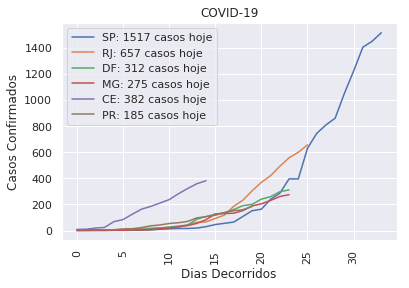

In [14]:
plotar_estados_dias(estados_para_plotar)

#### Projeções para _x_ dias:

**Exemplos:**

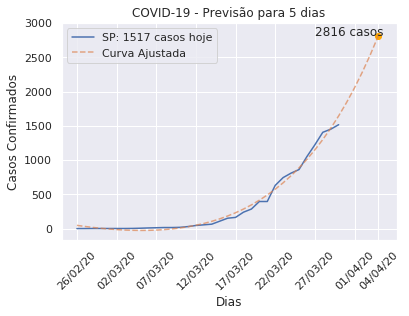

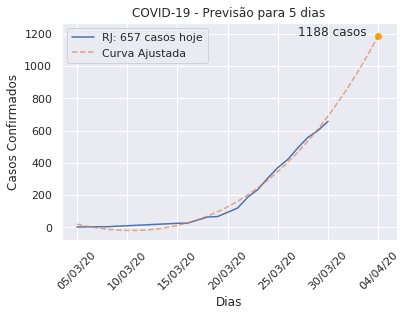

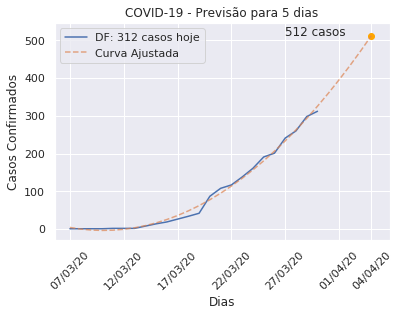

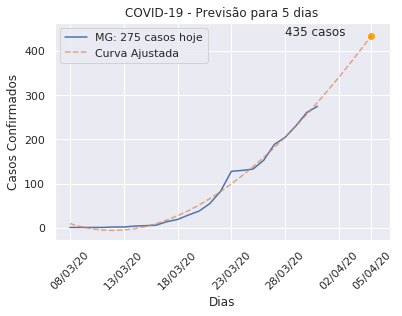

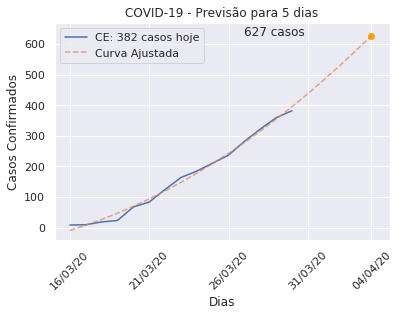

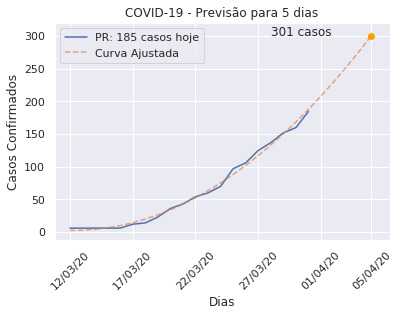

In [15]:
for estado in estados_para_plotar:
    linha_exp(estado, 5)

***
### 6. Faça você mesmo

Escola uma lista de Estados para comparar e, depois, um Estado com o número de dias para se prever:

In [16]:
estados_para_comparar = []

In [17]:
estado_a_prever = ''
x_dias = 0

In [18]:
plotar_estados_dias(estados_para_comparar)

linha_exp(estado_a_prever, x_dias)

Por favor, escolha uma lista de Estados para plotar utilizando suas siglas
Por favor, escolha um Estado para plotar utilizando sua sigla
